In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dask.dataframe as dd
from matplotlib import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Import Dataset

In [6]:
# import dataset
df_loans = pd.read_csv('loans.csv')

# Data Pre-processing

## Feature Encoding

In [7]:
# encode column grade, home_ownership, verification_status, loan_status, purpose, addr_state, zip_code, initial_lisr_status
df_encoded = pd.get_dummies(df_loans, columns=['grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'zip_code', 'initial_list_status'], drop_first=True)
df_encoded

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,zip_code_991,zip_code_992,zip_code_993,zip_code_994,zip_code_995,zip_code_996,zip_code_997,zip_code_998,zip_code_999,initial_list_status_w
0,12000,36,13.53,40000.0,16.94,0.0,0.0,7.0,2.0,5572,...,False,False,False,False,False,False,False,False,False,True
1,3000,36,12.85,25000.0,24.68,0.0,0.0,5.0,2.0,2875,...,False,False,False,False,False,False,False,False,False,False
2,28000,36,7.62,325000.0,18.55,0.0,1.0,15.0,0.0,29581,...,False,False,False,False,False,False,False,False,False,True
3,24000,36,13.53,100000.0,22.18,0.0,0.0,14.0,0.0,21617,...,False,False,False,False,False,False,False,False,False,True
4,8000,36,10.99,33000.0,15.75,0.0,1.0,9.0,1.0,7203,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175251,8525,60,18.25,37536.0,12.28,4.0,0.0,12.0,0.0,5318,...,False,False,False,False,False,False,False,False,False,False
175252,18000,36,7.90,90000.0,10.33,1.0,0.0,16.0,0.0,8224,...,False,False,False,False,False,False,False,False,False,False
175253,10000,36,18.25,42000.0,11.57,0.0,0.0,9.0,0.0,3196,...,False,False,False,False,False,False,False,False,False,False
175254,22000,60,19.97,78000.0,18.45,0.0,5.0,18.0,1.0,18238,...,False,False,False,False,False,False,False,False,False,False


## Split Data train and test

In [8]:
from sklearn.model_selection import train_test_split
# define X and y
X = df_encoded.drop('credible', axis=1)
y = df_encoded['credible']
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scalling

### Standarization

In [9]:
# standardize the data
from sklearn.preprocessing import StandardScaler
numerical_columns = X_train.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = scaler.transform(X_train.loc[:,numerical_columns])
X_test.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])

<ipython-input-9-bce28fb64283>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.52122933 -0.57031999  1.68785056 ...  1.31967058  0.27035763
  0.58331062]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])
<ipython-input-9-bce28fb64283>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.55190531 -0.55190531  1.81190503 ... -0.55190531  1.81190503
 -0.55190531]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])
<ipython-input-9-bce28fb64283>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.64863227 -0.54135346  0.45399123 ... -0.3236

## Balancing

In [10]:
# data balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Modeling

## Logistic Regression Model

Accuracy:  0.9998573547871733
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7963
         1.0       1.00      1.00      1.00     27089

    accuracy                           1.00     35052
   macro avg       1.00      1.00      1.00     35052
weighted avg       1.00      1.00      1.00     35052



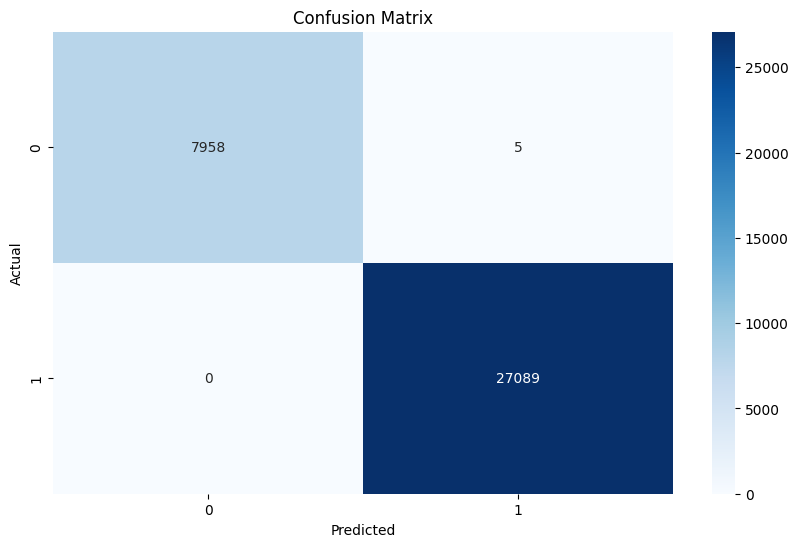

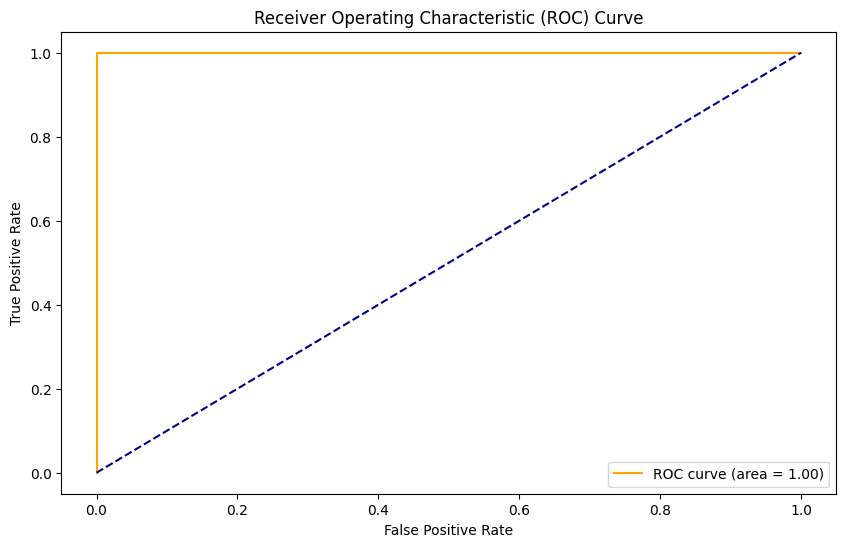

In [11]:
# train model using Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train Model
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)

# Predict
y_pred_LR = model_LR.predict(X_test)

# Evaluate Model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR, average="weighted")
recall_LR = recall_score(y_test, y_pred_LR, average="weighted")
f1_LR = f1_score(y_test, y_pred_LR, average="weighted")

print('Accuracy: ', accuracy_LR)
print('Classification Report: \n', classification_report(y_test, y_pred_LR))

# confusion matrix
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_LR.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Random Forest Model

Accuracy:  1.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7963
         1.0       1.00      1.00      1.00     27089

    accuracy                           1.00     35052
   macro avg       1.00      1.00      1.00     35052
weighted avg       1.00      1.00      1.00     35052



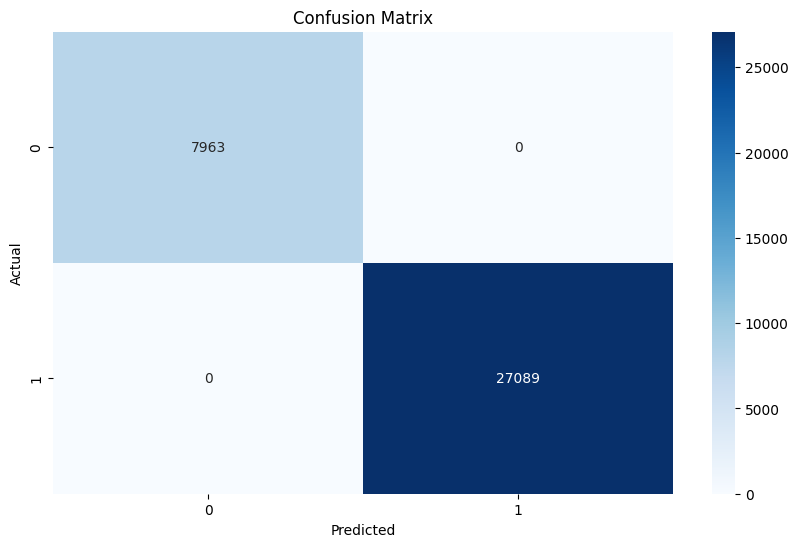

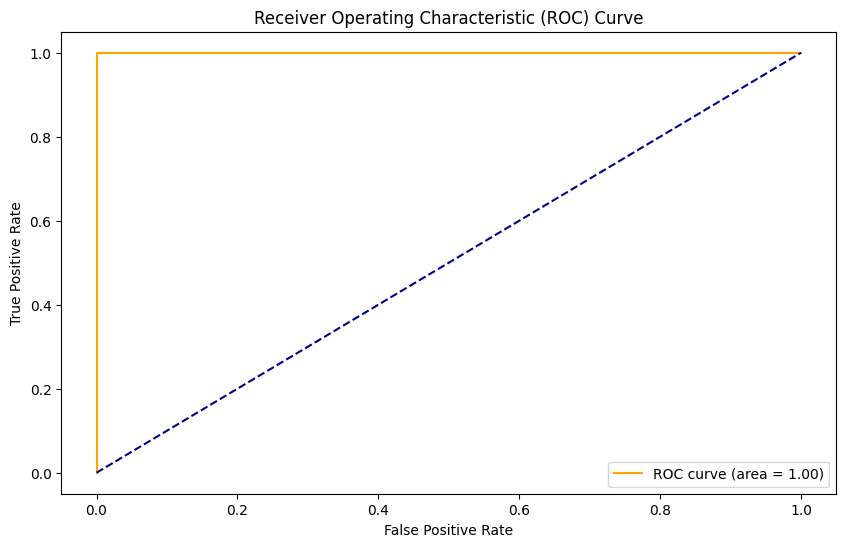

In [12]:
# train model using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Model
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

# Predict
y_pred_RF = model_RF.predict(X_test)

# Evaluate Model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average="weighted")
recall_RF = recall_score(y_test, y_pred_RF, average="weighted")
f1_RF = f1_score(y_test, y_pred_RF, average="weighted")

print('Accuracy: ', accuracy_RF)
print('Classification Report: \n', classification_report(y_test, y_pred_RF))

# confusion matrix
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Decision Tree Model

Accuracy:  1.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7963
         1.0       1.00      1.00      1.00     27089

    accuracy                           1.00     35052
   macro avg       1.00      1.00      1.00     35052
weighted avg       1.00      1.00      1.00     35052



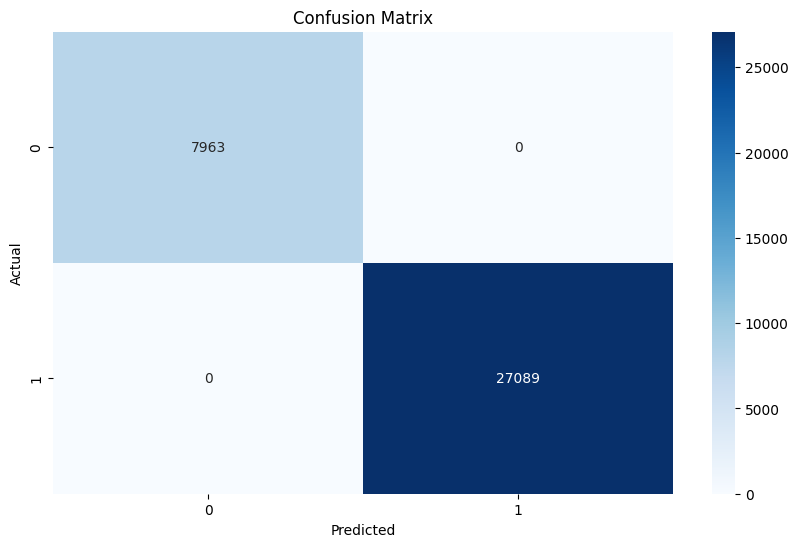

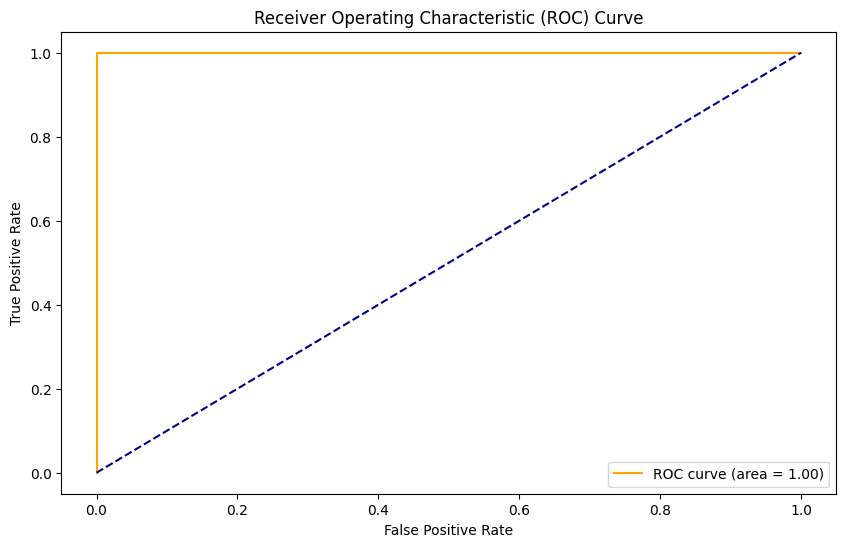

In [13]:
# train model using Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train Model
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

# Predict
y_pred_DT = model_DT.predict(X_test)

# Evaluate Model
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT, average="weighted")
recall_DT = recall_score(y_test, y_pred_DT, average="weighted")
f1_DT = f1_score(y_test, y_pred_DT, average="weighted")

print('Accuracy: ', accuracy_DT)
print('Classification Report: \n', classification_report(y_test, y_pred_DT))

# confusion matrix
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# KNN Model

Accuracy:  0.9597740499828826
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      7963
         1.0       0.97      0.98      0.97     27089

    accuracy                           0.96     35052
   macro avg       0.95      0.94      0.94     35052
weighted avg       0.96      0.96      0.96     35052



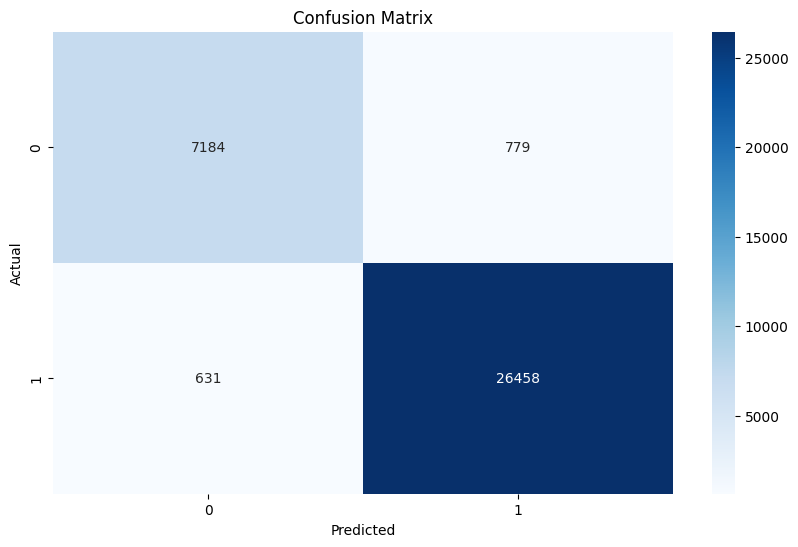

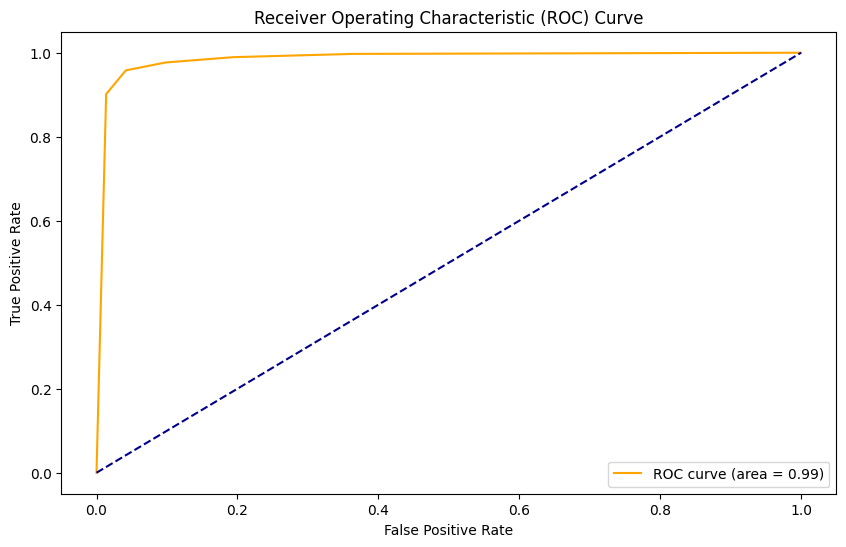

In [14]:
# train model using KNN
from sklearn.neighbors import KNeighborsClassifier

# Train Model
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

# Predict
y_pred_KNN = model_KNN.predict(X_test)

# Evaluate Model
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN, average="weighted")
recall_KNN = recall_score(y_test, y_pred_KNN, average="weighted")
f1_KNN = f1_score(y_test, y_pred_KNN, average="weighted")

print('Accuracy: ', accuracy_KNN)
print('Classification Report: \n', classification_report(y_test, y_pred_KNN))

# confusion matrix
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_KNN.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# XGBoost Model

Accuracy:  1.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7963
         1.0       1.00      1.00      1.00     27089

    accuracy                           1.00     35052
   macro avg       1.00      1.00      1.00     35052
weighted avg       1.00      1.00      1.00     35052



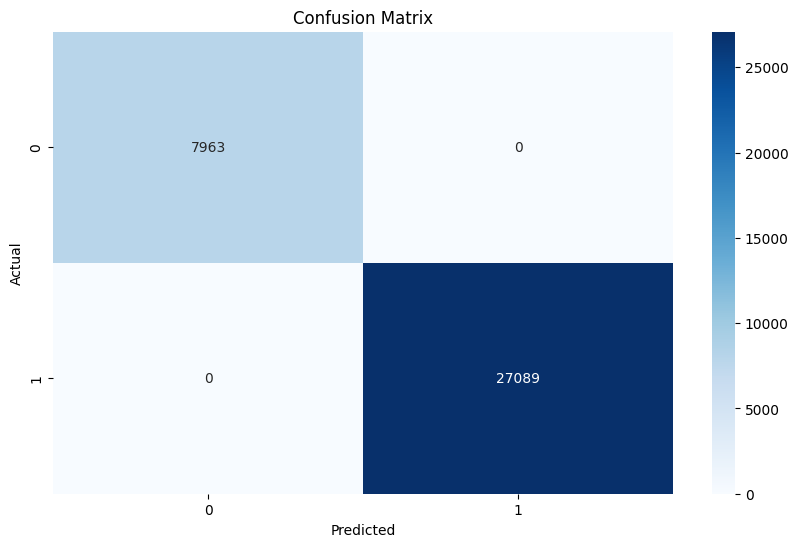

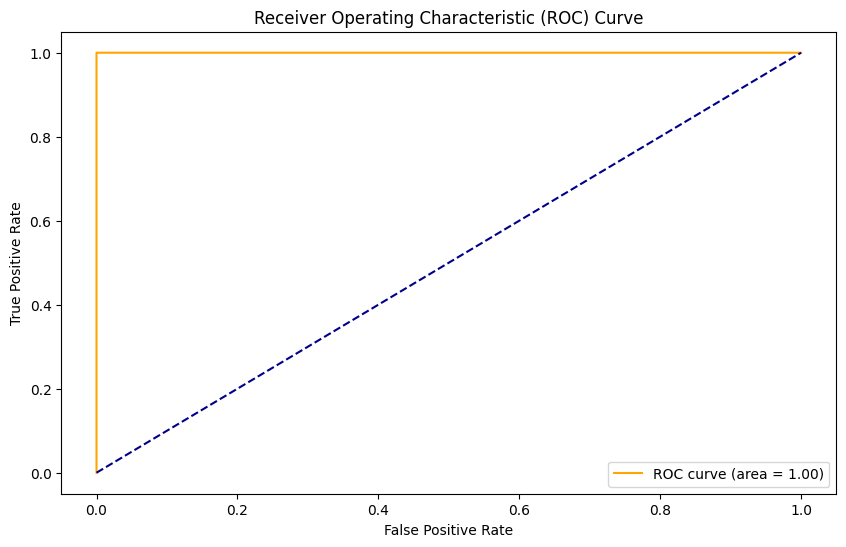

In [15]:
# train model using XGBoost
from xgboost import XGBClassifier

# Train Model
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

# Predict
y_pred_XGB = model_XGB.predict(X_test)

# Evaluate Model
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
precision_XGB = precision_score(y_test, y_pred_XGB, average="weighted")
recall_XGB = recall_score(y_test, y_pred_XGB, average="weighted")
f1_XGB = f1_score(y_test, y_pred_XGB, average="weighted")

print('Accuracy: ', accuracy_XGB)
print('Classification Report: \n', classification_report(y_test, y_pred_XGB))

# confusion matrix
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_XGB.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Result

In [16]:
from tabulate import tabulate

# Menyusun data hasil evaluasi ke dalam tabel
results = [{
    "Model": "Logistic Regression",
    "Accuracy": accuracy_LR,
    "Precision": precision_LR,
    "Recall": recall_LR,
    "F1 Score": f1_LR,
},
           {
    "Model": "Random Forest",
    "Accuracy": accuracy_RF,
    "Precision": precision_RF,
    "Recall": recall_RF,
    "F1 Score": f1_RF,
},
{
    "Model": "Decision Tree",
    "Accuracy": accuracy_DT,
    "Precision": precision_DT,
    "Recall": recall_DT,
    "F1 Score": f1_DT,
},
{
    "Model": "K-Nearest Neighbors",
    "Accuracy": accuracy_KNN,
    "Precision": precision_KNN,
    "Recall": recall_KNN,
    "F1 Score": f1_KNN,
},
{
    "Model": "XGBoost",
    "Accuracy": accuracy_XGB,
    "Precision": precision_XGB,
    "Recall": recall_XGB,
    "F1 Score": f1_XGB,
}]

# Menampilkan tabel hasil evaluasi
df_results = pd.DataFrame(results)
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1 Score │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ Logistic Regression │   0.999857 │    0.999857 │ 0.999857 │   0.999857 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ Random Forest       │   1        │    1        │ 1        │   1        │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ Decision Tree       │   1        │    1        │ 1        │   1        │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  3 │ K-Nearest Neighbors │   0.959774 │    0.959554 │ 0.959774 │   0.95964  │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  4 │ XGBoost             │   1        │    1        │ 1        │   1        │
╘════╧═════════════════════╧════════════

In [17]:
from tabulate import tabulate

# Menyusun data hasil evaluasi ke dalam tabel
results = [{
    "Model": "Logistic Regression",
    "Accuracy": accuracy_LR,
    "Precision": precision_LR,
    "Recall": recall_LR,
    "F1 Score": f1_LR,
},
           {
    "Model": "Random Forest",
    "Accuracy": accuracy_RF,
    "Precision": precision_RF,
    "Recall": recall_RF,
    "F1 Score": f1_RF,
},
{
    "Model": "K-Nearest Neighbors",
    "Accuracy": accuracy_KNN,
    "Precision": precision_KNN,
    "Recall": recall_KNN,
    "F1 Score": f1_KNN,
}
]

# Menampilkan tabel hasil evaluasi
df_results = pd.DataFrame(results)
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1 Score │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ Logistic Regression │   0.999857 │    0.999857 │ 0.999857 │   0.999857 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ Random Forest       │   1        │    1        │ 1        │   1        │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ K-Nearest Neighbors │   0.959774 │    0.959554 │ 0.959774 │   0.95964  │
╘════╧═════════════════════╧════════════╧═════════════╧══════════╧════════════╛
